<h1>#case1 - Heart Sisease Classification </h1><br>
29.1.2018<br>
Tom Thiel<br>
Metropolia UAS<br>

Directory contains 4 databases concerning heart disease diagnosis.


In [64]:
#Import limraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import models
from keras import layers

%matplotlib inline

In [ ]:
#version check
print('numpy', np.__version__)

In [65]:
#import datasets
filename_cleve = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
filename_hun = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data'
filename_ch = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
filename_va = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'

#column names for the data
colnames = ['age','sex','cp','tresbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

#datasets into dataframes and replace '?' values as NaN
df_cleve = pd.read_csv(filename_cleve, names=colnames, na_values = '?')
df_hun  = pd.read_csv(filename_hun, names=colnames, na_values = '?')
df_ch = pd.read_csv(filename_ch, names=colnames, na_values = '?')
df_va = pd.read_csv(filename_va, names=colnames, na_values = '?')

#Lets first see what the dataframes look like

Attribute Information used in this assignement:
   -- Only 14 used<br>
      -- 1. #3  (age)       
      -- 2. #4  (sex)       
      -- 3. #9  (cp)        
      -- 4. #10 (trestbps)  
      -- 5. #12 (chol)      
      -- 6. #16 (fbs) - fasting blood sugar    
      -- 7. #19 (restecg) - rest ECG
      -- 8. #32 (thalach) - Maximum HR
      -- 9. #38 (exang) - Excrecise induced angina
      -- 10. #40 (oldpeak) - ECG 
      -- 11. #41 (slope) - slopetype in ECG     
      -- 12. #44 (ca) - Angiography     
      -- 13. #51 (thal)      
      -- 14. #58 (num)       (the predicted attribute)

In [91]:
print(df_ch.shape, df_cleve.shape, df_va.shape, df_hun.shape)
df_va.tail()

(123, 14) (303, 14) (200, 14) (294, 14)


,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0
199,62,1,2,120.0,254.0,0.0,2,93.0,1.0,0.0,NaN,NaN,NaN,1


All the dataframes seem to have right amount of columns

In [67]:
#merge dataframes into list and concatenate them back as a dataframe
frames = [df_cleve, df_hun, df_ch, df_va]
df = pd.concat(frames)
df.shape

#np.sum(np.isnan(df_cleve)) way to see witch columns have missing values

(920, 14)

In total there are 920 samples on the.

In [83]:
#pd.isna(df['ca'], df['thal'])
#change num values to binaryvalues
# 0 = no heart disease
# 1 = heart disease
df = df.where(df['num'] < 1, 1, axis = 'columns')

#labels ) (df['num] > 0.values)
df.tail()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
195,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
196,62,1.0,1.0,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
197,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
198,58,1.0,4.0,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
199,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [97]:
df = df.where(~np.isnan(df), df.mode(), axis = 0)#logical not = ~ 

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Number of instaces on this Cleveland data is 303. <br>
On this dataset average age is 54 years and 67% of the sample data consist if males. <br>
Some values are missing from columns ca and thal 

In [93]:
df['chol'].count()

919

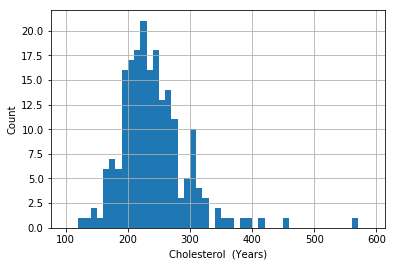

In [95]:
df['chol'].hist(bins = np.arange(100, 600, 10))
plt.xlabel('Cholesterol  (Years)')
plt.ylabel('Count')
plt.show()

On the documentation it is not defined wheter the cholesterol values as serum cholesterol in mg/dl present LDL-cholesterol or triglycerides. Being LDL-values the 500+ values could be outliers, but as triglycerides (ranging normally between 200 and 499 mg/dl) they are considered just as very high. Conceivably the values present triglycerides.

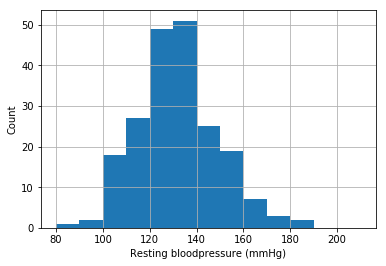

In [70]:
df['tresbps'].hist(bins = np.arange(80, 220, 10))
plt.xlabel('Resting bloodpressure (mmHg)')
plt.ylabel('Count')
plt.show()

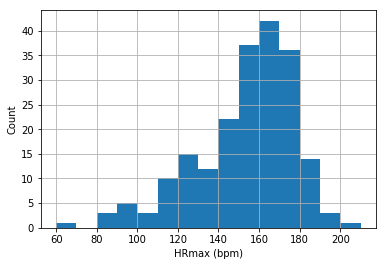

In [71]:
df['thalach'].hist(bins = np.arange(60, 220, 10))
plt.xlabel('HRmax (bpm)')
plt.ylabel('Count')
plt.show()

In [72]:
#scale the attributes between min and max
df2 = (df - df.min())/(df.max() - df.min())

# Select all atributes that were measured without angiography


# replace mode-vice, on each column. #num-columns should be replaced with 0 because it's the output value
df2.head()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.826667,1.0,0.000000,0.804469,0.413121,1.0,1.0,0.741294,0.0,0.641509,1.0,0.000000,0.833333,0.0
1,0,1.0,0.000000,0.000000,0.001773,1.0,0.5,0.000000,1.0,0.396226,0.0,0.333333,0.000000,1.0
2,0,1.0,0.000000,0.000000,0.001773,1.0,0.5,0.000000,1.0,0.396226,0.0,0.333333,0.000000,1.0
3,0.48,1.0,0.666667,0.720670,0.443262,0.0,0.0,0.925373,0.0,0.867925,1.0,0.000000,0.333333,0.0
4,0.533333,0.0,0.333333,0.720670,0.361702,0.0,1.0,0.850746,0.0,0.471698,0.0,0.000000,0.333333,0.0


In [73]:
columns = ['age', 'sex', 'cp', 'tresbps', 
           'chol', 'fbs', 'restecg', 'thalach', 
           'exang', 'oldpeak', 'slope']
data = df2[columns].values
       
df2.describe()

,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,901.000000,919.000000,912.000000,920.000000,901.000000,901.000000,899.000000,884.000000,860.000000,869.000000,920.000000
mean,0.918478,0.152174,0.162110,0.095008,0.804825,0.477717,0.170408,0.813541,0.379604,0.049774,0.287984,0.096087,0.757609
std,0.273784,0.308714,0.303186,0.181693,0.396553,0.229237,0.320407,0.389693,0.078379,0.174248,0.132185,0.228684,0.428763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.001773,1.000000,0.500000,0.000000,1.000000,0.396226,0.000000,0.333333,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.001773,1.000000,0.500000,0.000000,1.000000,0.396226,0.000000,0.333333,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.001773,1.000000,0.500000,0.000000,1.000000,0.396226,0.000000,0.333333,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
df2corr = df2.corr(method='pearson', min_periods=1)
df2corr['num']

sex        0.526704
cp        -0.871935
tresbps   -0.988881
chol      -0.909738
fbs        0.886664
restecg    0.171942
thalach   -0.983624
exang      0.884920
oldpeak    0.394160
slope     -0.551790
ca         0.709839
thal      -0.846316
num        1.000000
Name: num, dtype: float64

Correlation on is not particularly high in any row on column num. Highest positive correlations are found in: <br>
ST depression induced by exercise relative to rest (oldpeak) 50%<br> 
number of major vessels (0-3) colored by fluoroscopy (ca) 52%<br>
and maximum heart rate achieved (thal) 51%<br>

In [75]:
df2['num'].count()

920

In [76]:
labels = df2['num'].values

data = df2['thal'].values
jassir = np.array([data, labels])
jassir

array([[ 0.83333333,  0.        ,  0.        , ...,  0.        ,
                nan,  0.        ],
       [ 0.        ,  1.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ]])

In [77]:
ndata = df2['num'].count()

ntrain = int(0.9*ndata) # 90% for training, 10% for testing
train_data = data[:ntrain]
train_labels = labels[:ntrain]
test_data = data[ntrain:]
test_labels = labels[ntrain:]

In [78]:
# Define the architecture of the network

from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(15, activation = 'relu', input_shape=(2,)))
network.add(layers.Dense(15, activation = 'relu'))
network.add(layers.Dense(1, activation = 'sigmoid')) # ensures output is in range 0...1


In [79]:
# Compile the network

network.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

In [80]:
# Train the network

network.fit(train_data, train_labels, epochs = 5, batch_size = 5)

ValueError: Error when checking input: expected dense_4_input to have shape (None, 2) but got array with shape (828, 1)

In [ ]:
# Testing the trained network

test_loss, test_acc = network.evaluate(test_data, test_labels)
print('test_acc:', test_acc)

In [ ]:
# Investigate two sample points with the model

points = np.array([[0.2, 0.2], [0.7, 0.7]])
network.predict(points)